# Drzewa decyzyjne #

Będziemy dziś pracować na [zbiorze danych](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) uzyskanych z biopsji (aspiracyjnej cienkoigłowej) piersi. Zadaniem naszym jest wytrenowanie klasyfikatora, który po cechach wyników biopsji będzie klasyfikował guz jako łagodny lub złośliwy.

### Przygotowanie środowiska programistycznego

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from termcolor import colored

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def printScores(model, X, Y):
    print(colored("Classification report:","blue"))
    print(classification_report(Y, model.predict(X)))
    print(colored("Confusion matrix:","blue"))
    print(confusion_matrix(Y, model.predict(X)))

## Zbiór danych "cancer"
Dla wygodny ponownie umieścimy dane w `pandas.DataFrame`.

**Proszę:**
- załadować dane za pomocą `sklearn.dataset.load_breast_cancer`,
- umieścić dane w `pandas.DataFrame`
- dodać kolumnę `label` wypełnioną wartościami ```cancer.target```
- wypisać nazwy klas i cech

Oczekiwany wynik:
```Python
Nazwy klas: ['malignant' 'benign']
Nazwy cech: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
```

In [49]:
#BEGIN_SOLUTION
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["label"] = cancer.target

print(colored("Nazwy klas:","blue"),cancer['target_names'])
print(colored("Nazwy cech:","blue"),cancer['feature_names'])

#END_SOLUTION
pass

Nazwy klas: ['malignant' 'benign']
Nazwy cech: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**Proszę:**

* wypisać na ekran liczebność klas
* proszę narysować wykresy skrzypcowe dla poszczególnych cech z podziałem na gatunki,
* na podstawie rysunków ustalić czy cechy wymagają normalizacji (czy jest ona w ogóle potrzebna w przypadku drzew decyzyjnych?)

**Wskazówki** 
* zliczając klasy można skorzystać z metody ```DataFrame.groupby(...).count()```
* wykres skrzypcowy proszę narysować korzystając z kodu z notatnika `06_Klasyfikator_Bayesa_irysy`

Oczekiwany wynik:
```Python
Class counts:
 label
0    212
1    357
Name: label, dtype: int64
```

Class counts:
 label
0    212
1    357
Name: label, dtype: int64


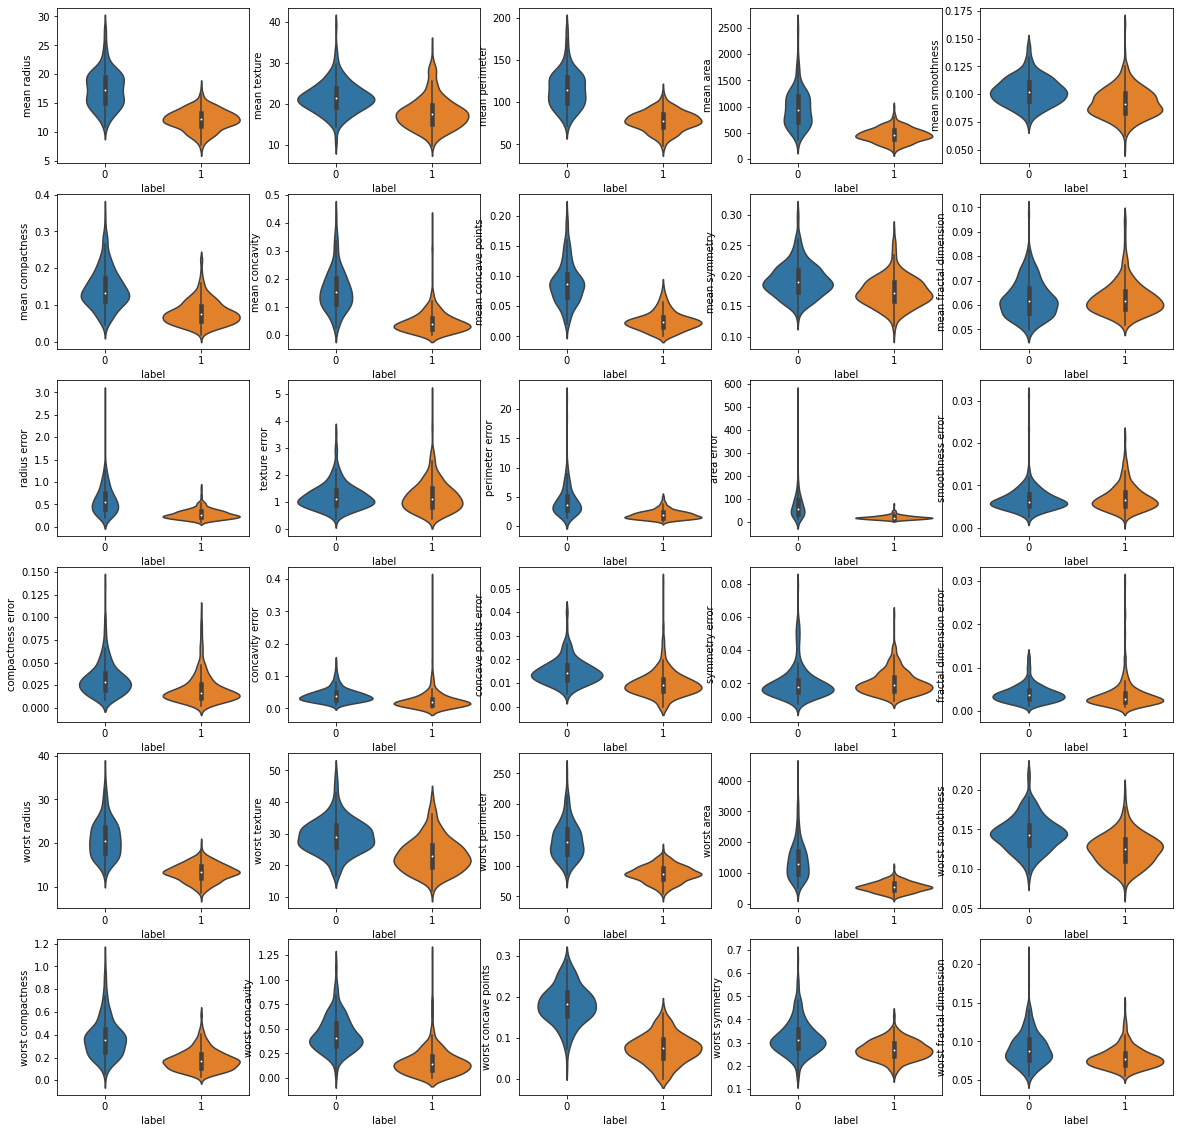

In [50]:
#BEGIN_SOLUTION
print(colored("Class counts:\n","blue"),df.groupby("label")["label"].count())
    
fig, axes = plt.subplots(6,5, figsize=(20,20))

for index, columnName in enumerate(df.columns[:-1]):
    sns.violinplot(data=df, x="label", y=columnName,ax=axes[(int)(index/5),index%5]);   
#END_SOLUTION
pass

**Proszę:** 

* narysować macierz korelacji (nie kowariancji!)

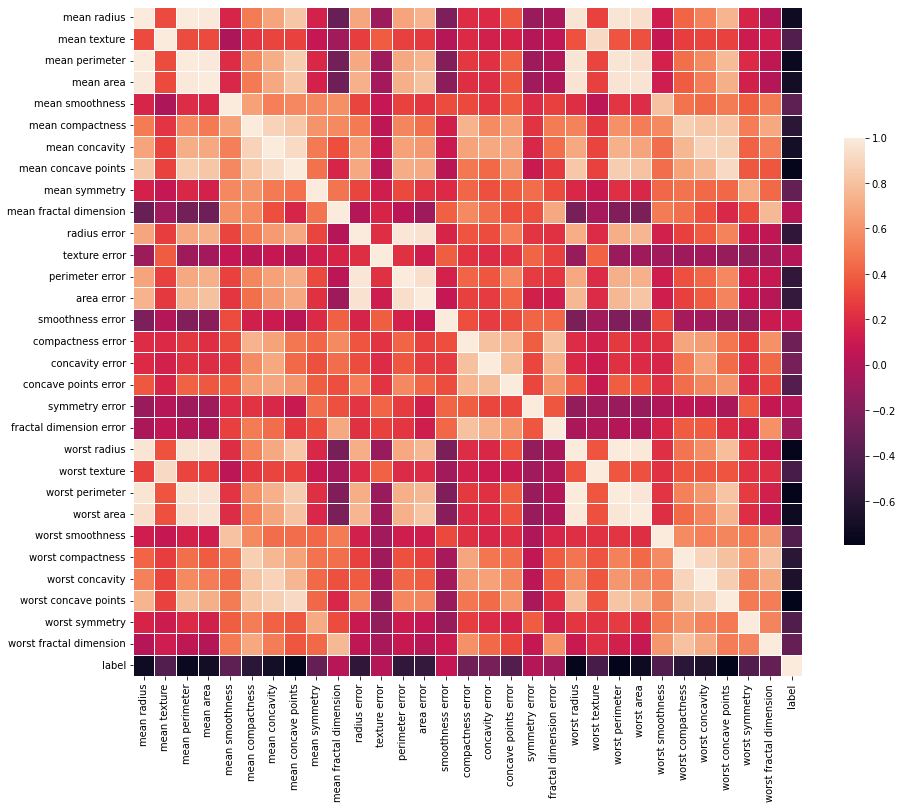

In [15]:
_, ax = plt.subplots(figsize=(15,15))

#BEGIN_SOLUTION
correlationMatrix = df.corr()
sns.heatmap(correlationMatrix, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);
#END_SOLUTION
pass

**Proszę:**
* podzielić dane na części uczącą i testową w proporcjach 80:20

**Uwaga**: proszę użyć parametru ```random_state=0``` by umożliowić porównanie wyników z innymi osobami

**Wkaszówka**: proszę skorzystać z funckji ```sklearn.model_selection.train_test_split```

In [57]:
#BEGIN_SOLUTION
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=0)
#END_SOLUTION
print(colored("Train dataset:\n","blue"),df_train["label"].describe())
print(colored("Test dataset:\n","blue"),df_test["label"].describe())

Train dataset:
 count    455.000000
mean       0.637363
std        0.481291
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64
Test dataset:
 count    114.000000
mean       0.587719
std        0.494418
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64


## Definicja i trening klasyfikatora

W bibliotece scikit-learn drzewa decyzyjne implementowane są przez klasę [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Szczegóły implementacji opisane są [tutaj](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use).


**Proszę:**

* utworzyć obiekt ```dtc``` klasy DecisionTreeClassifier
* przeprowadzić trening z użyciem funkcji ```fit()```

In [108]:
#BEGIN_SOLUTION
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(df_train.drop(columns='label'), df_train['label']);
#END_SOLUTION
X = df_train.drop(columns='label').iloc[0:1]
print(colored("Ścieżka decyzyjna dla wybranego przykładu:\n","blue"), dtc.decision_path(X))
pass

Ścieżka decyzyjna dla wybranego przykładu:
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 11)	1
  (0, 12)	1


# Wizualizacja drzewa

Po wytrenowaniu można zilustrować drzewo decyzyjne.

* za pomocą narzędzia Graphiz. Może to wymagać zainstalowania w systemie tego narzędzia, oraz biblioteki pydot:

```Python
!pip3 install graphviz pydotplus
```

Otrzymany rysunek można bejrzeć klikając w menu po lewej, lub wyświetlająć go w komórce.

* za pomocą funkcji `plot_tree` pakietu `sklearn.tree`

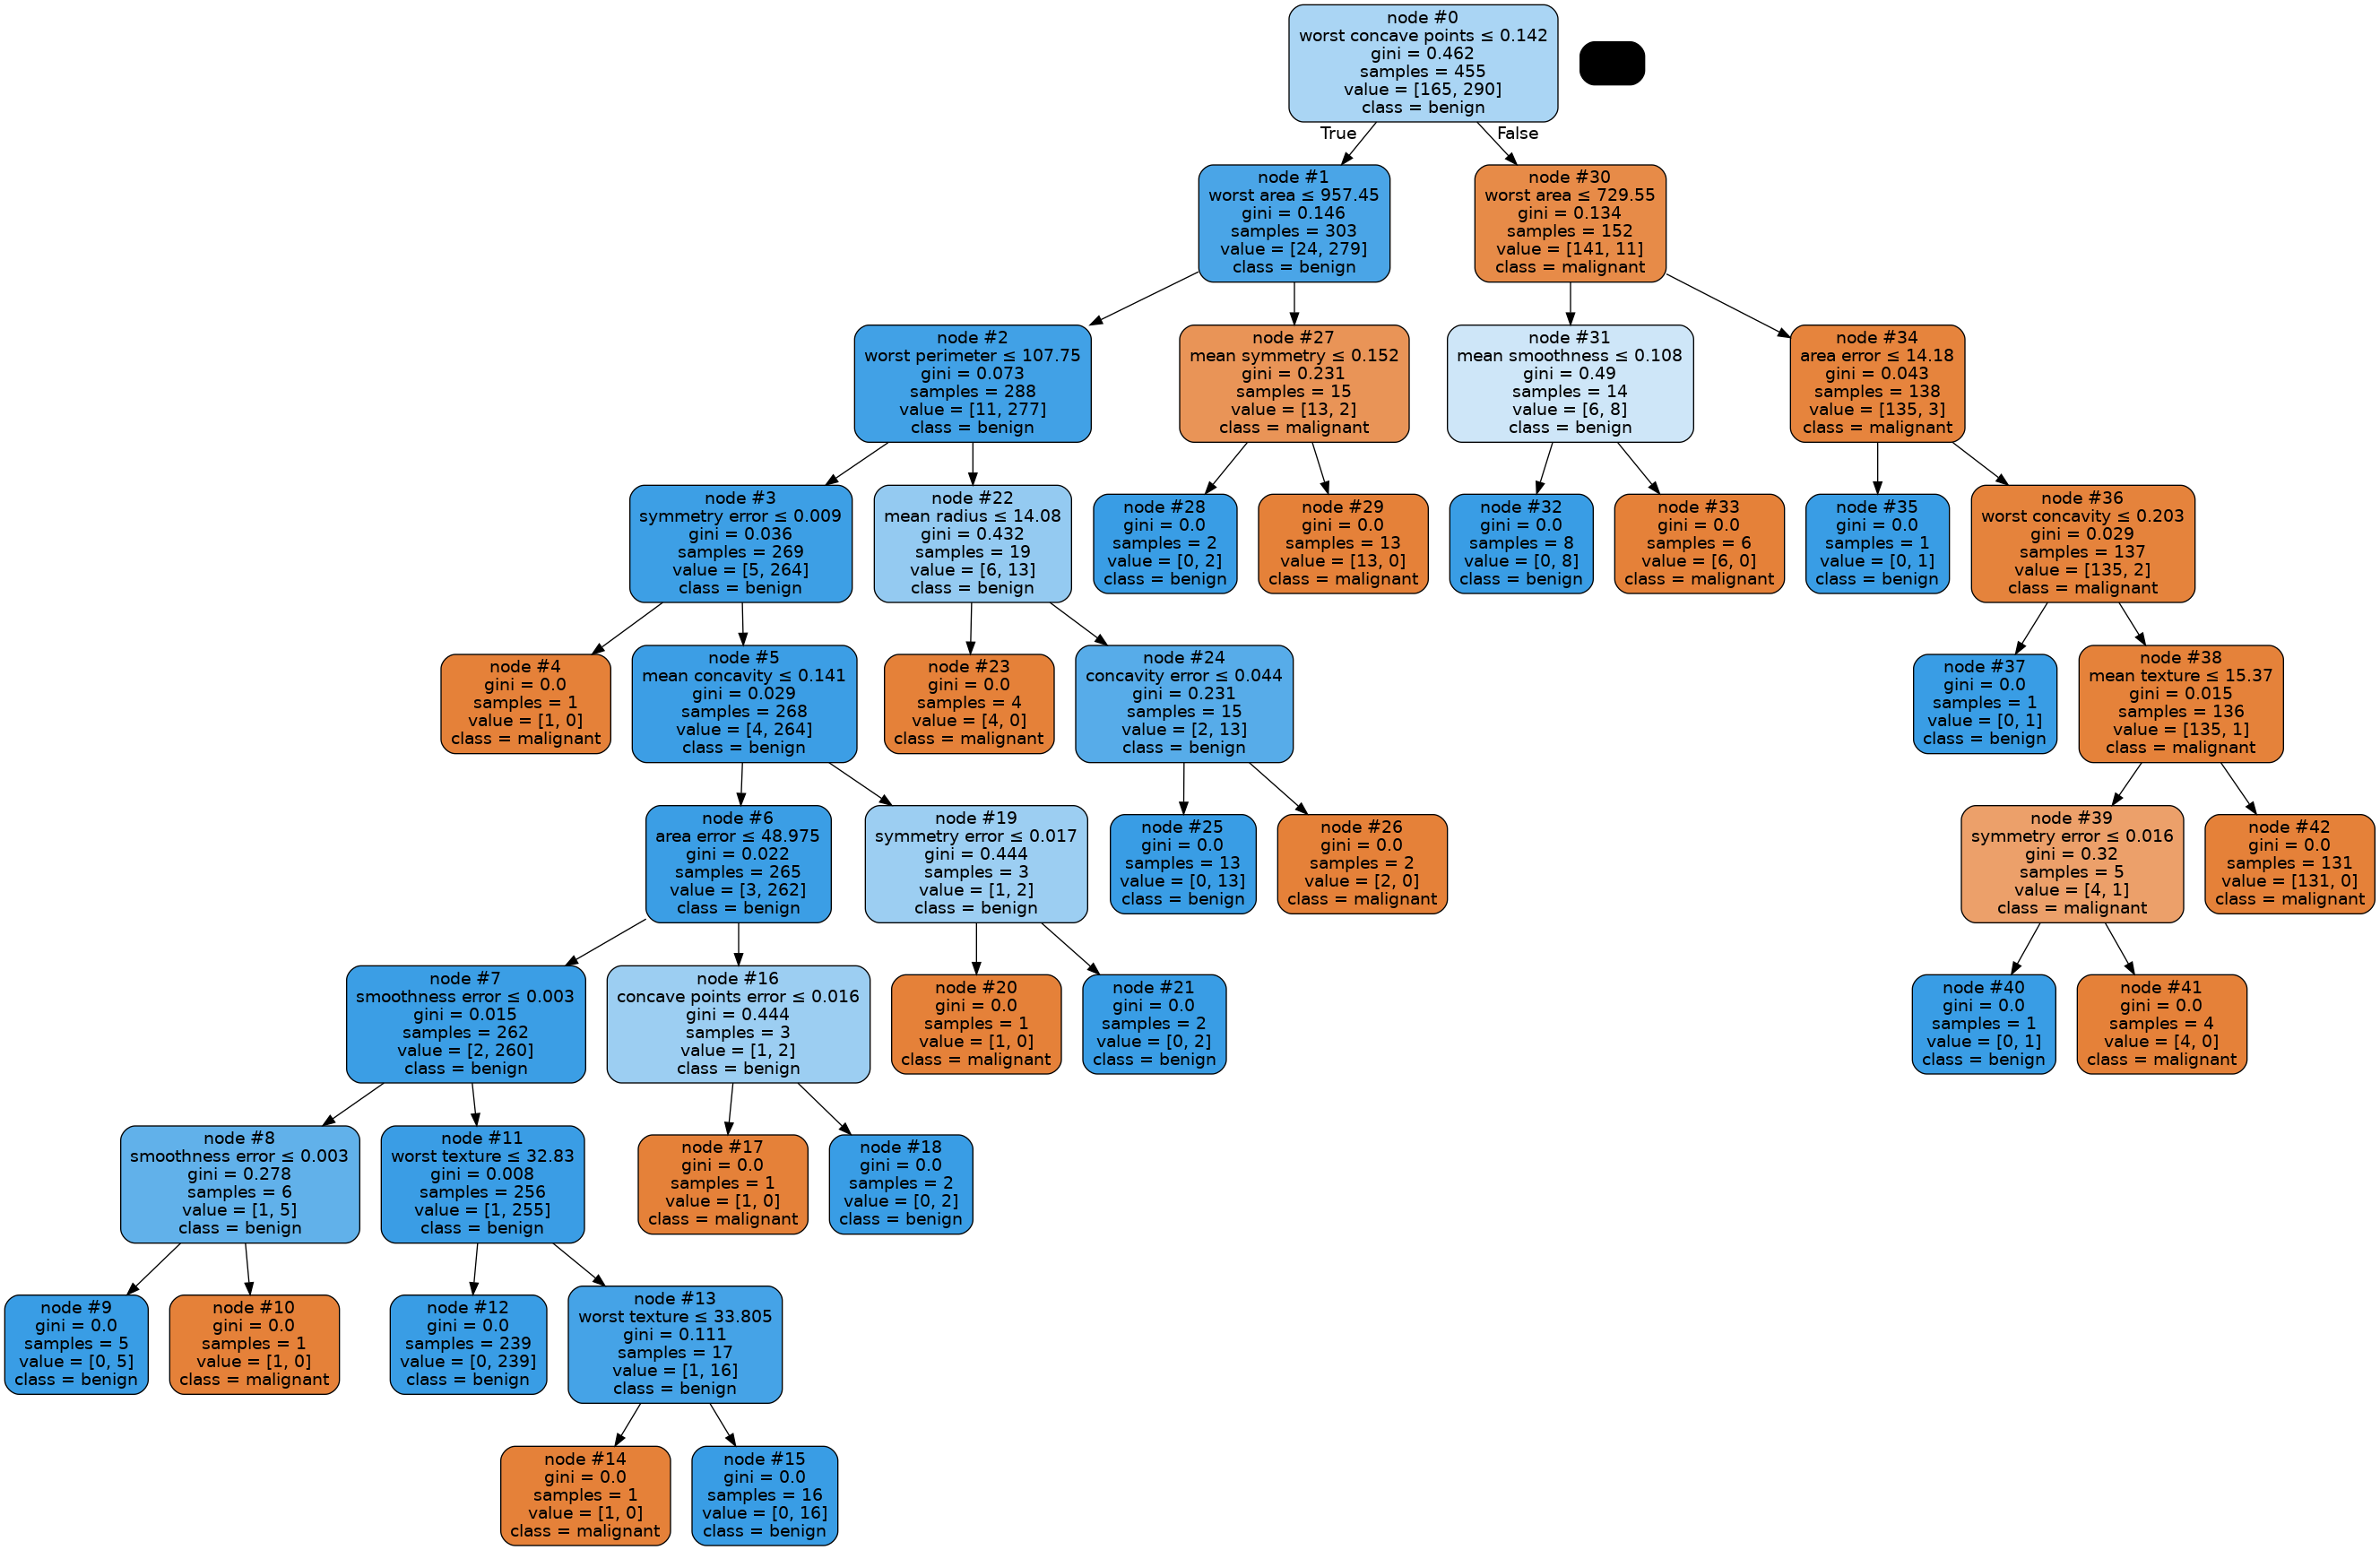

In [109]:
import pydotplus
import io
from IPython.display import Image
from sklearn.tree import export_graphviz, plot_tree

dot_data = io.StringIO()
export_graphviz(dtc, out_file=dot_data,
                    filled=True, rounded=True,
                    rotate=False,
                    node_ids = True,
                    special_characters=True,
                    leaves_parallel=False,
                    feature_names = cancer.feature_names,
                    class_names=cancer.target_names,
                   )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png');

from IPython.display import Image
Image(graph.create_png())

[Text(0.6390086206896551, 0.95, 'worst concave points <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(0.4849137931034483, 0.85, 'worst area <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(0.38362068965517243, 0.75, 'worst perimeter <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(0.28448275862068967, 0.65, 'symmetry error <= 0.009\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(0.25, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.31896551724137934, 0.55, 'mean concavity <= 0.141\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(0.22413793103448276, 0.45, 'area error <= 48.975\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(0.13793103448275862, 0.35, 'smoothness error <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(0.06896551724137931, 0.25, 'smoothness error <= 0.003\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.034482758620689655, 0.15, 'gini = 0.0\nsamples = 5\nvalue = [0

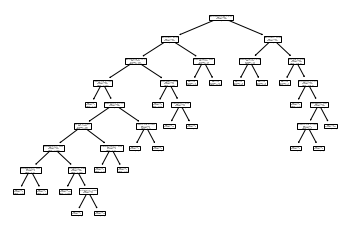

In [110]:
plot_tree(dtc, feature_names=cancer.feature_names)

**Proszę:**

* wypisać na ekran raport klasyfikacji oraz macierz pomyłek dla zbioru **testowego**
* wypisać na ekran raport klasyfikacji oraz macierz pomyłek dla zbioru **treningowego**
* proszę wyciągnąć wnioski z tych raportów

In [111]:
#BEGIN_SOLUTION
print(colored("Test dataset:","blue"))
printScores(dtc, df_test.drop(columns='label'), df_test['label'])
print(colored("Train dataset:","blue"))
printScores(dtc, df_train.drop(columns='label'), df_train['label'])
#END_SOLUTION
pass

Test dataset:
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Confusion matrix:
[[44  3]
 [ 7 60]]
Train dataset:
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       290

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Confusion matrix:
[[165   0]
 [  0 290]]


# Analiza ważności cech

Komórka poniżej tworzy wykres szeregujący cechy według ich wpływu na wynik klasyfikacji.

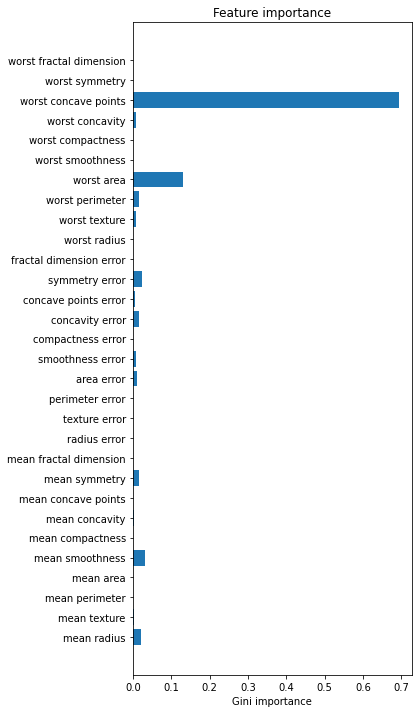

In [117]:
plt.figure(figsize=(5,12))
fi = dtc.feature_importances_
plt.barh(cancer.feature_names, fi)
plt.title('Feature importance')
plt.xlabel('Gini importance');

## Regularyzacja drzewa 


W przypadku drzew decyzyjnych regularyzacja polega przede wszystkim na:
- przycinaniu gałęzi i liści (czyli zmniejszaniu liczby węzłów) przez kontrolę parametru `min_samples_leaf` który zadaje daje dolne ograniczenie na liczbę przykładów w liściu drzewa. Jeśli kolejna gałązka miałaby rozpatrywać liczbę przykładów `< min_sample_leaf`, to nie tworzy się.
- ograniczaniu głębokości drzewa, któ©ym steruje parametr `max_depth`

**Proszę:**

* sprawdzić jaka jest domyślnia wartość parametrów `min_sample_leaf` i `max_depth`
* proszę wytrenować klasyfikatory z różnymi wartościami parametrów `min_sample_leaf` i `max_depth` i wybrać ten któ©y daje najlepesze wyniki na zbiorze testowym.

In [134]:
#BEGIN_SOLUTION

def trainDecisionTree(max_depth=5, min_samples_leaf=1):
    dtc = DecisionTreeClassifier()
    dtc.set_params(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    print(colored("Model params:","blue"),"max_depth={}, min_samples_leaf={}".format(dtc.get_params()["max_depth"],dtc.get_params()["min_samples_leaf"] ))
    dtc.fit(df_train.drop(columns='label'), df_train['label']);
    print(colored("Test dataset:","blue"))
    printScores(dtc, df_test.drop(columns='label'), df_test['label'])

trainDecisionTree(max_depth=10, min_samples_leaf=10)
trainDecisionTree(max_depth=5, min_samples_leaf=10)
trainDecisionTree(max_depth=5, min_samples_leaf=1)
#END_SOLUTION
pass

Model params: max_depth=10, min_samples_leaf=10
Test dataset:
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
[[44  3]
 [ 1 66]]
Model params: max_depth=5, min_samples_leaf=10
Test dataset:
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
[[44  3]
 [ 1 66]]
Model params: max_depth=5, min_samples_leaf=1
Test dataset:
Classification report:
              precis

### Automatyczne skanowanie parametrów drzewa

Istnieją automatyczne algorytmy do poszukiwania optymalnych parametrów drzewa, np. `cost_complexity_pruning_path` które są sterowane prze jeden parameter: `cost complexity parameter` w skrócie  `ccp_alpha`. 

**Proszę:**

* skorzystać z metody `DecisionTreeClassifier.cost_complexity_pruning_path` i narysować wykres zanieczyszzceń `impurity` w funkcji `cpp_alpha`

**Wskazówka:** proszę skorzystać z [dokumentacji](https://scikit-learn.org/0.22/auto_examples/tree/plot_cost_complexity_pruning.html)

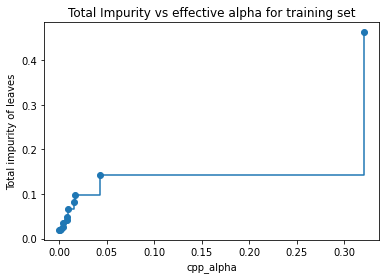

In [137]:
#BEGIN_SOLUTION
path = dtc.cost_complexity_pruning_path(df_train.drop(columns='label'), df_train['label'])
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#END_SOLUTION

fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("cpp_alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

**Proszę:**

* wytrenować drzewa dla każej wartości parametru ```ccp_alpha``` uzyskanej z funkcji `cost_complexity_pruning_path`
* wytrenowane drzewa zachować w liście ```dtcls```

In [145]:
#BEGIN_SOLUTION
dtcls = [DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) for ccp_alpha in ccp_alphas]

for tree in dtcls:
    tree.fit(df_train.drop(columns='label'), df_train['label'])
#END_SOLUTION    
    
print(colored("Number of nodes in the last tree is:","blue"),"{} with ccp_alpha: {:3.2f}".format(
     dtcls[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32


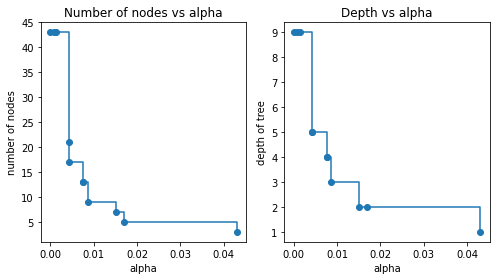

In [168]:
#BEGIN_SOLUTION
node_counts = [dtc.tree_.node_count for dtc in dtcls]
tree_depth = [dtc.tree_.max_depth for dtc in dtcls]
#END_SOLUTION

fig, ax = plt.subplots(1, 2, figsize=(7,4))

ax[0].plot(ccp_alphas[:-1], node_counts[:-1], marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas[:-1], tree_depth[:-1], marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Proszę:

* narysować dokładność (ang. accuracy) w funkcji parametru ```ccp_alpha``` dla zbiorów uczącego i treningowego

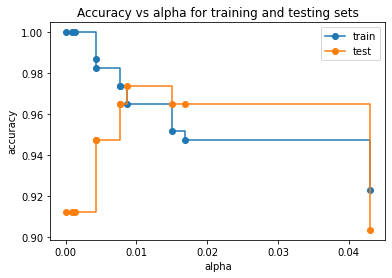

In [175]:
#BEGIN_SOLUTION
train_scores = [dtc.score(df_train.drop(columns='label'), df_train['label']) for dtc in dtcls]
test_scores = [dtc.score(df_test.drop(columns='label'), df_test['label']) for dtc in dtcls]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
#END_SOLUTION
pass

**Proszę:**

* na podstawie rysunku wybrać optymalną wartość ```cpp_alpha``` i wypisać dla niej raport klasyfikacji oraz narysować drzewo
* zadać wagi próbek tak, by ważona suma wszystkich próbek obu klas była taka sama, tzn. jeżeli masz 10 próbek klasy A i 5 próbek klasy B, to możesz dać     próbkom z klasy A wagę 0.5 a próbkom z klasy B wagę 1.0. 
* proszę sprawdzić czy wagi są poprawne
* przeprowadź trening na danych oryginalnych i ważonych
* porównać jakość klasyfikacji

**Wskazówka** do obliczania wag proszę użyć funkcji ```sklearn.utils.class_weight.compute_sample_weight```

Suma wag dla klasy 0: 227.5
Suma wag dla klasy 1: 227.5
Model trenowany na danych ważonych
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
[[45  2]
 [ 4 63]]


Model trenowany na danych oryginalnych
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
[[45  2]
 [ 1 66]]


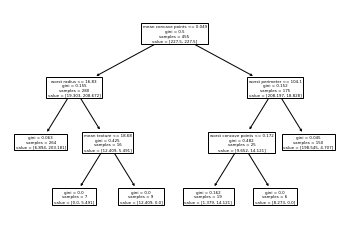

In [176]:
dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)

sample_weight = compute_sample_weight(class_weight="balanced", y=df_train['label'])
print(colored("Suma wag dla klasy 0:","blue"),np.sum(sample_weight[df_train['label']==0]))
print(colored("Suma wag dla klasy 1:","blue"),np.sum(sample_weight[df_train['label']==1]))

print(colored("Model trenowany na danych ważonych","blue"))
dtc.fit(df_train.drop(columns='label'), df_train['label'], sample_weight=sample_weight);
printScores(dtc, df_test.drop(columns='label'), df_test['label'])
plot_tree(dtc, feature_names=cancer.feature_names)

print("\n")
print(colored("Model trenowany na danych oryginalnych","blue"))
dtc.fit(df_train.drop(columns='label'), df_train['label']);
printScores(dtc, df_test.drop(columns='label'), df_test['label'])

# Zadanie domowe